Average Annual Growth Rate (AAGR): 19.23%


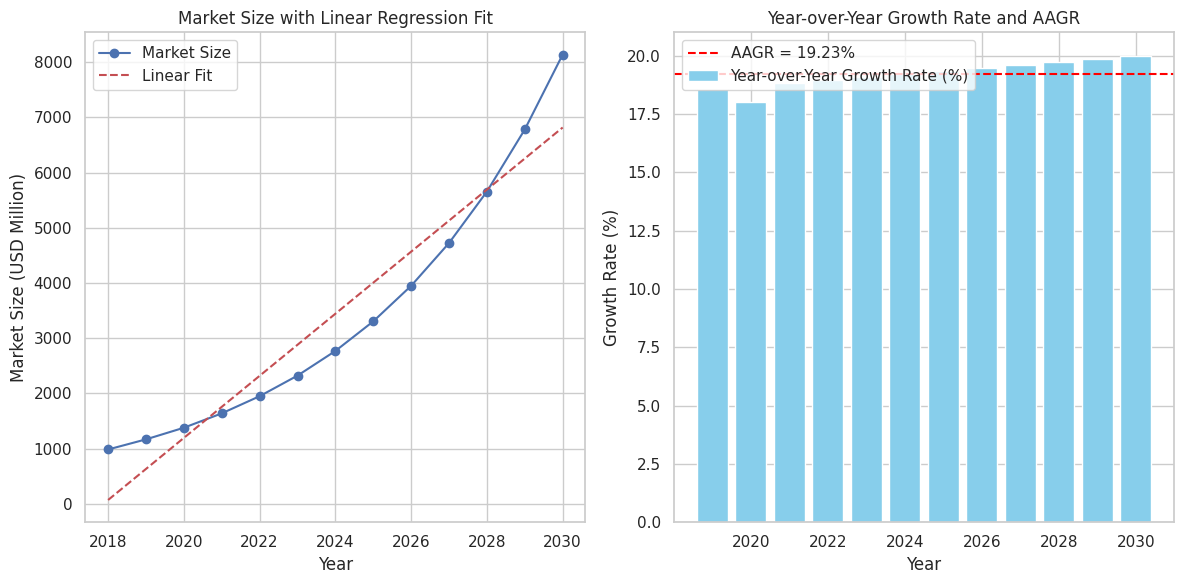

Average Annual Growth Rate (AAGR): 19.23%


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Set Seaborn style for better visualization in Kaggle
sns.set(style="whitegrid")

# Load the dataset
file_path = '/kaggle/input/global-smart-lock-market/Global Smart Lock Market.csv'
data = pd.read_csv(file_path)

# Rename columns for easier reference (if needed)
data.columns = ['Year', 'Market_Size_USD_M']

# Calculate year-over-year growth rates and AAGR
data['Growth_Rate'] = data['Market_Size_USD_M'].pct_change()  # Percentage change year-over-year
data['Growth_Rate'] = data['Growth_Rate'] * 100  # Convert to percentage

# Calculate the AAGR
AAGR = data['Growth_Rate'].mean()  # The average of all year-over-year growth rates
print(f"Average Annual Growth Rate (AAGR): {AAGR:.2f}%")

# Prepare data for linear regression
X = data['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = data['Market_Size_USD_M'].values     # Dependent variable (Market Size)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting the year-over-year growth rate
plt.figure(figsize=(12, 6))

# Plot the original market size data
plt.subplot(1, 2, 1)
plt.plot(data['Year'], data['Market_Size_USD_M'], marker='o', linestyle='-', color='b', label='Market Size')
plt.plot(data['Year'], y_pred, linestyle='--', color='r', label='Linear Fit')
plt.title('Market Size with Linear Regression Fit')
plt.xlabel('Year')
plt.ylabel('Market Size (USD Million)')
plt.legend()

# Plot the year-over-year growth rate
plt.subplot(1, 2, 2)
plt.bar(data['Year'][1:], data['Growth_Rate'][1:], color='skyblue', label="Year-over-Year Growth Rate (%)")
plt.axhline(y=AAGR, color='red', linestyle='--', label=f"AAGR = {AAGR:.2f}%")
plt.title('Year-over-Year Growth Rate and AAGR')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Output AAGR
print(f"Average Annual Growth Rate (AAGR): {AAGR:.2f}%")




### YoY Growth Rate Formula:
$$
\text{YoY Growth Rate}_t = \left( \frac{\text{Market Size}_t - \text{Market Size}_{t-1}}{\text{Market Size}_{t-1}} \right) \times 100
$$

### AAGR Formula:
$$
\text{AAGR} = \frac{1}{n-1} \sum_{t=2}^{n} \text{YoY Growth Rate}_t
$$
